# Chapter 4 - Representing data and engineering features

# Binning, Discretization, Linear Models and Trees

In [39]:
# Pre-reqs and libraries to import
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

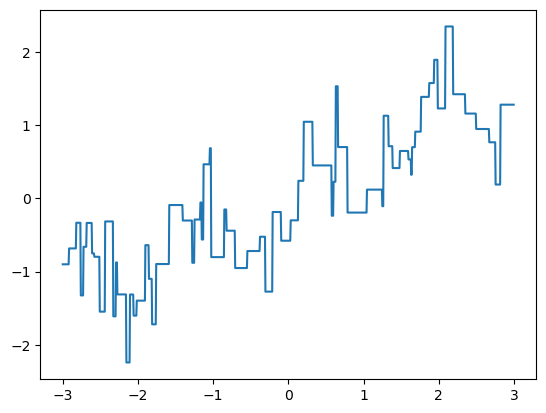

In [10]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

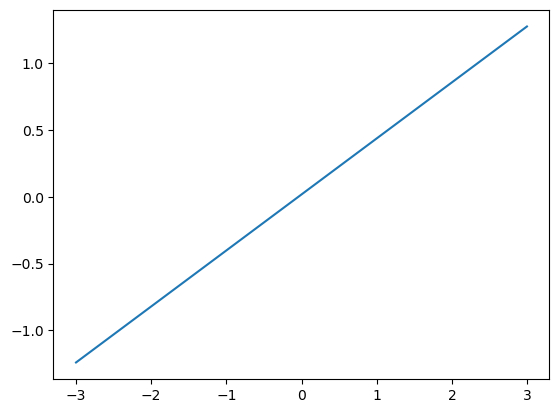

In [12]:
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

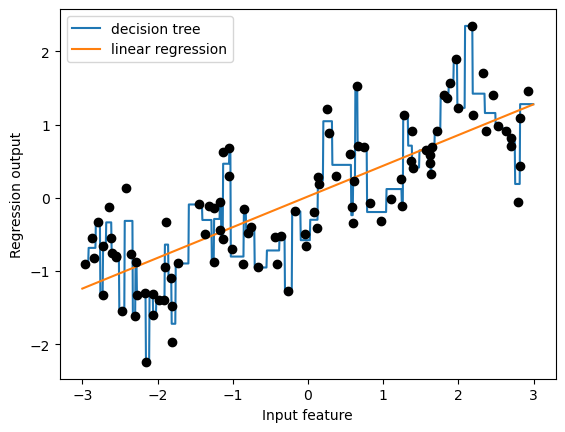

In [13]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [14]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [15]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [17]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder()
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

  (0, 3)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 5)	1.0
  (4, 1)	1.0


Text(0.5, 0, 'Input feature')

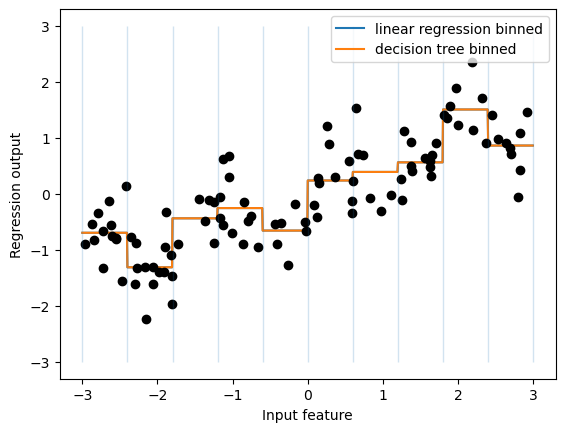

In [18]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

# Polynomials

In [21]:
X, y = mglearn.datasets.make_wave(n_samples=100)

In [29]:
X[:2]

array([[-0.75275929],
       [ 2.70428584]])

In [51]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [52]:
X_poly[:2]

array([[-0.75275929,  0.56664654, -0.42654845,  0.32108831],
       [ 2.70428584,  7.3131619 , 19.77688015, 53.48233692]])

In [53]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4']


In [50]:
-0.75275929 ** 4

-0.32108831113243347

- "Using polynomial features together with a linear regression model yields the classical model of polynomial regression"

In [54]:
reg = LinearRegression().fit(X_poly, y)

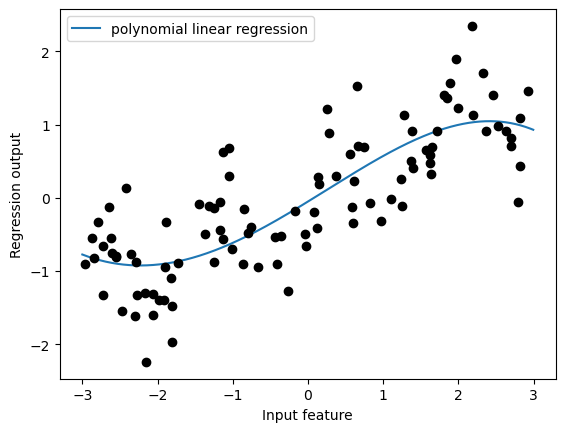

In [55]:
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# Page 227

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
lr = LinearRegression().fit(X_train, y_train)


In [43]:
lr.score(X_test, y_test)


0.6737519498011358

In [44]:
y_pred = lr.predict(X_test)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# The default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=2, include_bias=False)

In [76]:
poly.fit(X_train_scaled)

PolynomialFeatures(include_bias=False)

In [77]:
poly_x_train = poly.transform(X_train_scaled)

In [78]:
poly_x_test = poly.transform(X_test_scaled)

In [79]:
polylr = LinearRegression().fit(poly_x_train, y)

In [80]:
polylr.score(poly_x_train, y_train)

1.0

In [74]:
polylr.score(poly_x_test, y_test)

-16153.061923939624